# Data Preprocessing

<hr />

## Outlier Analysis

  * Important Functions for Outliers

    1. Create a function to detect outliers

    2. Are there outliers in the desired columns(create function)?

    3. Creating a function to separate categorical and numerical variables

    4. Are there outliers in the dataframe(create function)?

    5. Outlier detection function

  * Univariate Outlier Analysis

    1. Remove Outliers

    2. Fill with Average Outliers

    3. Replace with Thresholds
  
  * Multivariate Outlier Analysis

    1. Remove Outliers

    2. Replace with Thresholds(not recommended)

## Missing Data Analysis

  * Quick Solution for Missing Value

    1. Remove Outliers

    2. Assigning a Value
  
  * Predictive Methods

  * Show Missing Value on Plot

  * Analysis of Missing Values with Dependent Value

## Encoding Scaling

  1. Label Encoder

  2. One Hot Encoding

  3. Rare Encoding

## Feature Scaling

  1. StandardScaler

  2. RobustScaler

  3. MinMaxScaler

## Feature Extraction

  1. Binary Features

  2. Text Features

  3. Regex Features

  4. Date Features

## Feature Interaction

## ***Feature Engineering and Data Preprocessing Application***
    

## Import Dataset

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
pd.set_option("display.max_columns",None)
pd.set_option("display.width",500)
pd.set_option("display.float_format", lambda x: '%.3f' % x)
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000,1,0,7.250,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.000,1,0,71.283,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.000,0,0,7.925,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.000,1,0,53.100,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.000,0,0,8.050,S,Third,man,True,NaN,Southampton,no,True


# Outlier Analysis

## Important Functions for Outliers

### Create a function to detect outliers

In [16]:
def outlier_thresholds(dataframe,col_name,q1=0.25,q3=0.75):
  quartile1 = dataframe[col_name].quantile(q1)
  quartile3 = dataframe[col_name].quantile(q3)
  interquartile_range = quartile3 - quartile1
  low_limit = quartile1 - 1.5 * interquartile_range
  up_limit = quartile3 + 1.5 * interquartile_range
  return low_limit,up_limit

In [ ]:
outlier_thresholds(df,"age")

(-6.6875, 64.8125)

### Are there outliers in the desired columns(create function)?

In [17]:
def check_outlier(dataframe, col_name):
  low_limit,up_limit = outlier_thresholds(dataframe,col_name)
  if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
    return True
  else:
    return False

In [ ]:
check_outlier(df,"age")

True

### Creating a function to separate categorical and numerical variables

In [69]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
  #Catgeorical Variable Selection
  cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category","object","bool"]]
  num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes in ["uint8","int64","float64"]]
  cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and str(dataframe[col].dtypes) in ["category","object"]]
  cat_cols = cat_cols + num_but_cat
  cat_cols = [col for col in cat_cols if col not in cat_but_car]

  #Numerical Variable Selection
  num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ["uint8","int64","float64"]]
  num_cols = [col for col in num_cols if col not in cat_cols]

  return cat_cols, num_cols, cat_but_car

### Are there outliers in the dataframe(create function)?

In [18]:
def check_outlier_dataframe(dataframe):
  cat_cols, num_cols, cat_but_car = grab_col_names(dataframe)
  for col in num_cols:
    print(col, check_outlier(dataframe, col))

In [ ]:
check_outlier_dataframe(df)

age True
fare True


### Outlier detection function

In [ ]:
def grab_outliers(dataframe, col_name, index=False):
  low_limit, up_limit = outlier_thresholds(dataframe, col_name)
  if dataframe[((dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit))].shape[0] > 10:
    print(dataframe[((dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit))].head())
  else:
    print(dataframe[((dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit))])
  if index:
    outlier_index = dataframe[((dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit))].index
    return outlier_index

In [ ]:
grab_outliers(df,"age")

     survived  pclass   sex   age  sibsp  parch     fare embarked   class  who  adult_male deck  embark_town alive  alone
33          0       2  male  66.0      0      0  10.5000        S  Second  man        True  NaN  Southampton    no   True
54          0       1  male  65.0      0      1  61.9792        C   First  man        True    B    Cherbourg    no  False
96          0       1  male  71.0      0      0  34.6542        C   First  man        True    A    Cherbourg    no   True
116         0       3  male  70.5      0      0   7.7500        Q   Third  man        True  NaN   Queenstown    no   True
280         0       3  male  65.0      0      0   7.7500        Q   Third  man        True  NaN   Queenstown    no   True


# Univariate Outlier Analysis

## Remove Outliers

In [ ]:
def remove_outlier(dataframe, col_name):
  low_limit, up_limit = outlier_thresholds(dataframe, col_name)
  df_without_outliers = dataframe[~((dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit))]
  return df_without_outliers

In [ ]:
def remove_outlier_dataframe(dataframe):
  cat_cols, num_cols, cat_but_car = grab_col_names(dataframe)
  for col in num_cols:
    df_without_outliers = remove_outlier(dataframe, col)
  return df_without_outliers

In [ ]:
new_df = remove_outlier_dataframe(df)

## Fill with Average Outliers

In [ ]:
def fill_with_average_outliers(dataframe, col_name):
  low_limit, up_limit = outlier_thresholds(dataframe, col_name)
  dataframe.loc[((dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit)), col_name] = dataframe[col_name].mean()

In [ ]:
def fill_with_average_outliers_dataframe(dataframe):
  cat_cols, num_cols, cat_but_car = grab_col_names(dataframe)
  for col in num_cols:
    fill_with_average_outliers(dataframe, col)

In [ ]:
fill_with_average_outliers_dataframe(df)

## Replace with Thresholds

In [20]:
def replace_with_thresholds(dataframe, col_name):
  low_limit, up_limit = outlier_thresholds(dataframe, col_name)
  dataframe.loc[(dataframe[col_name] < low_limit), col_name] = low_limit
  dataframe.loc[(dataframe[col_name] > up_limit), col_name] = up_limit

In [21]:
def replace_with_thresholds_dataframe(dataframe):
  cat_cols, num_cols, cat_but_car = grab_col_names(dataframe)
  for col in num_cols:
    replace_with_thresholds(dataframe, col)

In [ ]:
replace_with_thresholds_dataframe(df)

# Multivariate Outlier Analysis

## Remove Outliers

In [ ]:
def multivariate_remove_outlier(dataframe, n_neighbors=20, contamination=0.1, threshold_number=13):
  import numpy as np
  from sklearn.neighbors import LocalOutlierFactor
  # remove missing value
  dataframe = dataframe.dropna()
  
  cat_cols, num_cols, cat_but_car = grab_col_names(dataframe)
  dataframe = dataframe[num_cols]
  clf = LocalOutlierFactor(n_neighbors=n_neighbors, contamination=contamination)
  clf.fit_predict(dataframe)
  df_scores = clf.negative_outlier_factor_
  threshold_value = np.sort(df_scores)[threshold_number]
  dataframe = dataframe.loc[df_scores > threshold_value]
  return dataframe

In [ ]:
multivariate_remove_outlier(df)

,age,fare
1,38.0,71.2833
3,35.0,53.1000
6,54.0,51.8625
10,4.0,16.7000
11,58.0,26.5500
...,...,...
871,47.0,52.5542
872,33.0,5.0000
879,56.0,83.1583
887,19.0,30.0000


## Replace with Thresholds(not recommended)

In [ ]:
def multivariate_replace_with_thresholds(dataframe, n_neighbors=20, contamination=0.1, threshold_number=13):
  import numpy as np
  from sklearn.neighbors import LocalOutlierFactor
  # remove missing value
  dataframe = dataframe.dropna()
  
  cat_cols, num_cols, cat_but_car = grab_col_names(dataframe)
  dataframe = dataframe[num_cols]
  clf = LocalOutlierFactor(n_neighbors=n_neighbors, contamination=contamination)
  clf.fit_predict(dataframe)
  df_scores = clf.negative_outlier_factor_
  threshold_value = np.sort(df_scores)[threshold_number]
  threshold_row = dataframe[df_scores == threshold_value]
  no_outlier_df = df_scores > threshold_value
  outliers = dataframe[~no_outlier_df]
  res  = outliers.to_records(index=False)
  res[:] = threshold_row.to_records(index=False)
  dataframe[~no_outlier_df] = pd.DataFrame(res, index=dataframe[~no_outlier_df].index)
  return dataframe[~no_outlier_df]

In [ ]:
multivariate_replace_with_thresholds(df)

,age,fare
27,1.0,39.0
88,1.0,39.0
96,1.0,39.0
118,1.0,39.0
183,1.0,39.0
299,1.0,39.0
311,1.0,39.0
341,1.0,39.0
438,1.0,39.0
445,1.0,39.0


# Missing Value Analysis

## Create Missing Value Table for Dataframe

In [24]:
def missing_value_table(dataframe, na_name=False):
  na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
  n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
  ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
  missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=["n_miss","ratio"])
  print(missing_df, end="\n")

  if na_name:
    return na_columns

In [ ]:
missing_value_table(df, na_name=True)

             n_miss  ratio
deck            688 77.220
age             177 19.870
embarked          2  0.220
embark_town       2  0.220


['age', 'embarked', 'deck', 'embark_town']

## Quick Solution for Missing Value

### Remove Outliers

In [ ]:
# Drop Missing Value
df = df.dropna()

### Assigning a Value

In [ ]:
# Assigning a Value for dataframe
df = df.apply(lambda x: x.fillna(x.mean()) if x.dtype not in ["category","object","bool"] else x, axis=0)
df = df.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype != "O" and len(x.unique()) <= 10) else x, axis=0)

In [ ]:
# Assigning a Value for variable 1.method
df["age"] = df["age"].fillna(df.groupby("sex")["age"].transform("mean"))

In [ ]:
# Assigning a Value for variable 2.method
df.loc[(df["age"].isnull()) & (df["sex"]=="female"), "age"] = df.groupby("sex")["age"].mean()["female"]
df.loc[(df["age"].isnull()) & (df["sex"]=="male"), "age"] = df.groupby("sex")["age"].mean()["male"]

## Predictive Methods

In [ ]:
def predictive_missing_value_KNN(dataframe, n_neighbors=5):
  cat_cols, num_cols, cat_but_car = grab_col_names(dataframe)
  dff = pd.get_dummies(dataframe[cat_cols + num_cols], drop_first=True)
  from sklearn.preprocessing import MinMaxScaler
  scaler = MinMaxScaler()
  dff = pd.DataFrame(scaler.fit_transform(dff), columns=dff.columns)
  from sklearn.impute import KNNImputer
  imputer = KNNImputer(n_neighbors=n_neighbors)
  dff = pd.DataFrame(imputer.fit_transform(dff), columns=dff.columns)
  dff = pd.DataFrame(scaler.inverse_transform(dff), columns=dff.columns)
  return dff


In [ ]:
predictive_missing_value_KNN(df)

,adult_male,alone,survived,pclass,sibsp,parch,age,fare,sex_male,embarked_Q,embarked_S,class_Second,class_Third,who_man,who_woman,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,embark_town_Queenstown,embark_town_Southampton,alive_yes
0,1.000,0.000,0.000,3.000,1.000,0.000,22.000,7.250,1.000,0.000,1.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
1,0.000,0.000,1.000,1.000,1.000,0.000,38.000,71.283,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
2,0.000,1.000,1.000,3.000,0.000,0.000,26.000,7.925,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000
3,0.000,0.000,1.000,1.000,1.000,0.000,35.000,53.100,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000
4,1.000,1.000,0.000,3.000,0.000,0.000,35.000,8.050,1.000,0.000,1.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,1.000,1.000,0.000,2.000,0.000,0.000,27.000,13.000,1.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
887,0.000,1.000,1.000,1.000,0.000,0.000,19.000,30.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000
888,0.000,0.000,0.000,3.000,1.000,2.000,33.600,23.450,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
889,1.000,1.000,1.000,1.000,0.000,0.000,26.000,30.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000


## Show Missing Value on Plot


In [ ]:
def show_missing_value_plot(dataframe, bar=True, matrix=True, heatmap=True):
  !pip install missingno
  import missingno as msno
  if bar:
    msno.bar(dataframe);
  if matrix:
    msno.matrix(dataframe);
  if heatmap:
    msno.heatmap(dataframe);

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


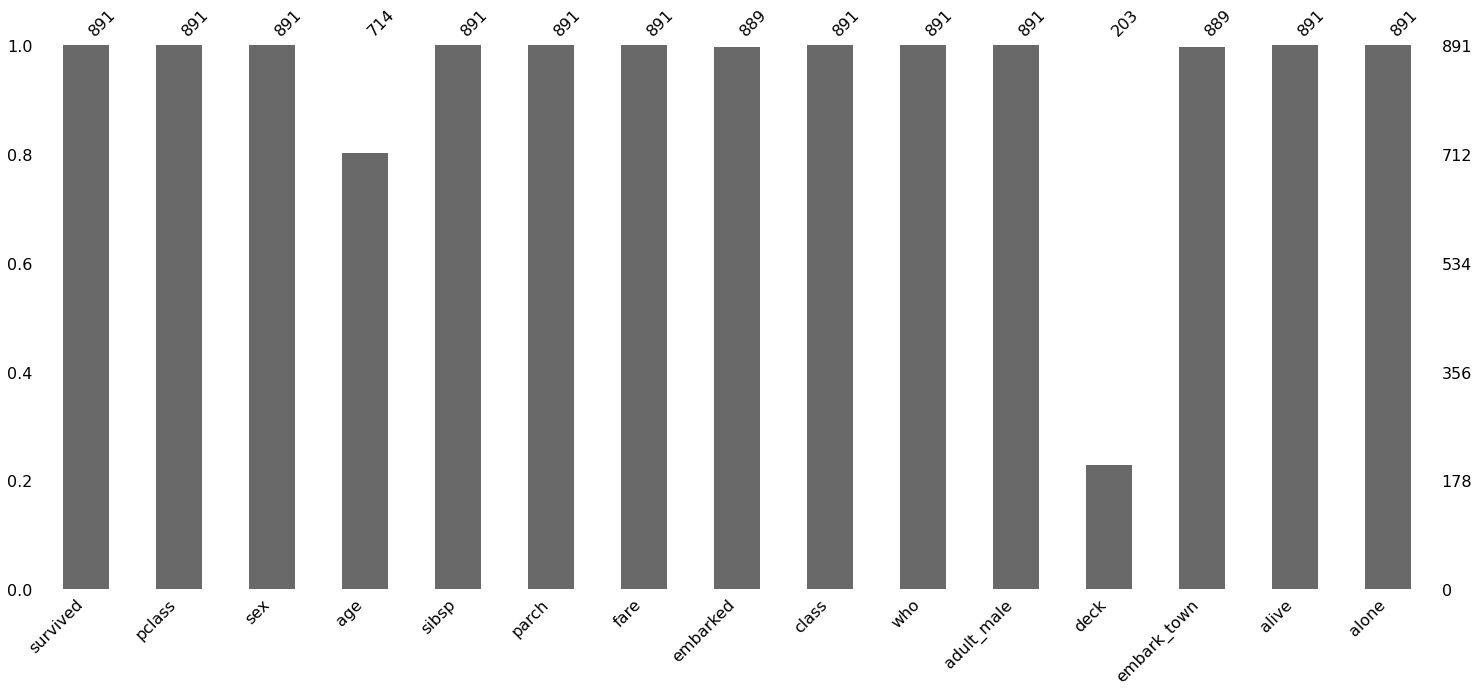

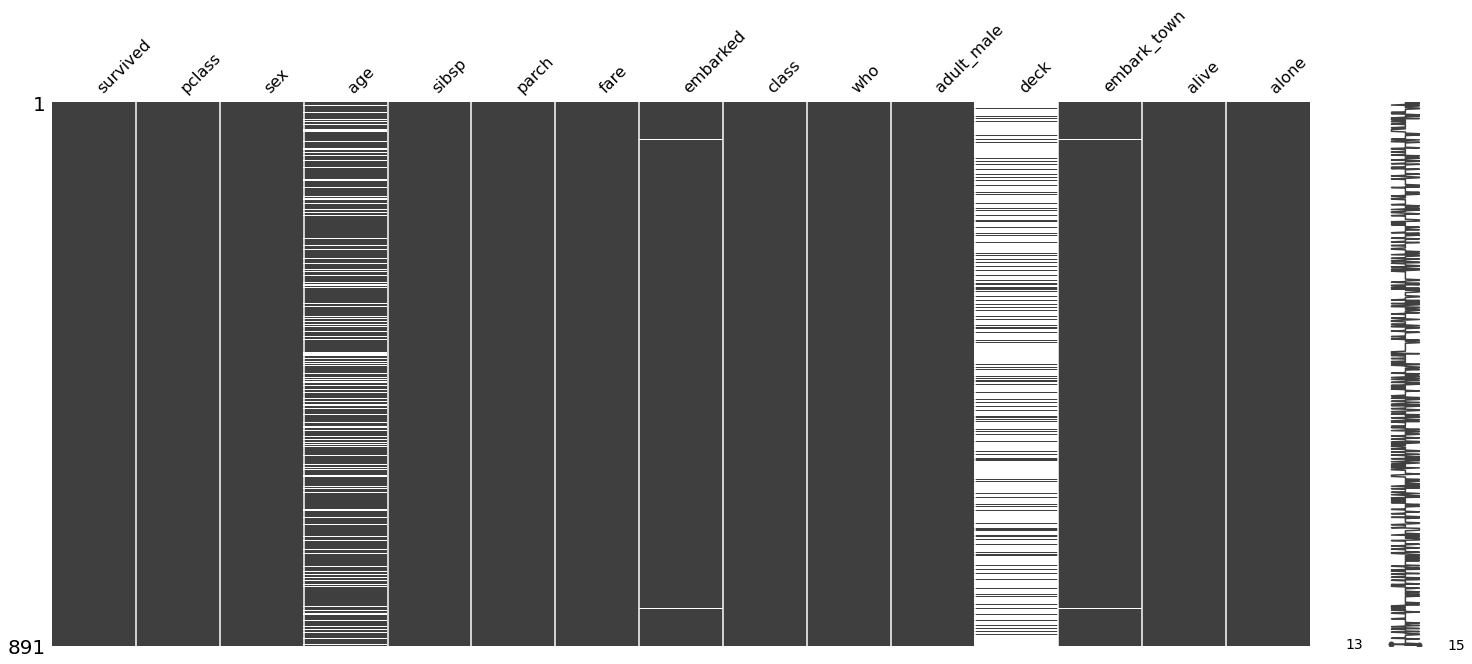

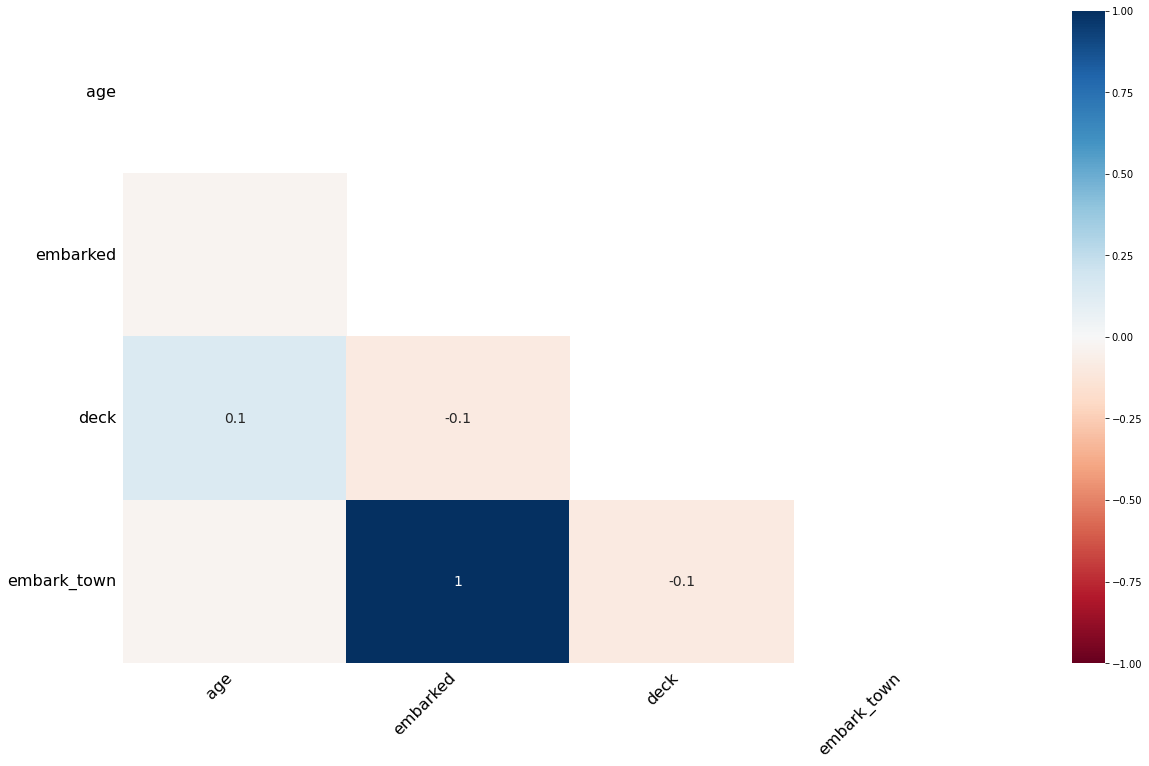

In [ ]:
show_missing_value_plot(df)

## Analysis of Missing Values with Dependent Value

In [ ]:
def missing_vs_target(dataframe, target):
  na_columns = missing_value_table(dataframe, na_name=True)
  temp_df = dataframe.copy()
  for col in na_columns:
    temp_df[col + "_NA_FLAG"] = np.where(temp_df[col].isnull(), 1, 0)
  na_flags = temp_df.loc[:, temp_df.columns.str.contains("_NA_")].columns
  for col in na_flags:
    print(pd.DataFrame({"TARGET_MEAN": temp_df.groupby(col)[target].mean(),
                        "Count": temp_df.groupby(col)[target].count()}), end="\n\n\n")

In [ ]:
missing_vs_target(df,"survived")

             n_miss  ratio
deck            688 77.220
age             177 19.870
embarked          2  0.220
embark_town       2  0.220
             TARGET_MEAN  Count
age_NA_FLAG                    
0                  0.406    714
1                  0.294    177


                  TARGET_MEAN  Count
embarked_NA_FLAG                    
0                       0.382    889
1                       1.000      2


              TARGET_MEAN  Count
deck_NA_FLAG                    
0                   0.670    203
1                   0.299    688


                     TARGET_MEAN  Count
embark_town_NA_FLAG                    
0                          0.382    889
1                          1.000      2




# Ecnoding Scaling

## Label Encoder

In [36]:
def label_encoder(dataframe, binary_col):
  from sklearn.preprocessing import LabelEncoder
  labelencoder = LabelEncoder()
  dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
  return dataframe

In [ ]:
label_encoder(df, "sex")

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.000,1,0,7.250,S,Third,man,True,NaN,Southampton,no,False
1,1,1,0,38.000,1,0,71.283,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,0,26.000,0,0,7.925,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,0,35.000,1,0,53.100,S,First,woman,False,C,Southampton,yes,False
4,0,3,1,35.000,0,0,8.050,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000,0,0,13.000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,0,19.000,0,0,30.000,S,First,woman,False,B,Southampton,yes,True
888,0,3,0,NaN,1,2,23.450,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,1,26.000,0,0,30.000,C,First,man,True,C,Cherbourg,yes,True


In [37]:
def label_encoder_dataframe(dataframe):
  binary_cols = [col for col in dataframe.columns if dataframe[col].dtype not in [int, float] and dataframe[col].nunique() == 2]
  for col in binary_cols:
    label_encoder(dataframe, col)

In [ ]:
label_encoder_dataframe(df)

## One Hot Encoding

In [50]:
def on_hot_encoding(dataframe, drop_first=True):
  label_encoder_dataframe(dataframe)
  cat_cols = [col for col in dataframe.columns if  10>= dataframe[col].nunique() > 2]
  dataframe = pd.get_dummies(dataframe, columns=cat_cols, drop_first=drop_first)
  return dataframe

In [ ]:
on_hot_encoding(df)

,survived,sex,age,fare,adult_male,alive,alone,pclass_2,pclass_3,sibsp_1,sibsp_2,sibsp_3,sibsp_4,sibsp_5,sibsp_8,parch_1,parch_2,parch_3,parch_4,parch_5,parch_6,embarked_Q,embarked_S,class_Second,class_Third,who_man,who_woman,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,embark_town_Queenstown,embark_town_Southampton
0,0,1,22.000,7.250,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1
1,1,0,38.000,71.283,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
2,1,0,26.000,7.925,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1
3,1,0,35.000,53.100,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1
4,0,1,35.000,8.050,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,27.000,13.000,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1
887,1,0,19.000,30.000,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1
888,0,0,NaN,23.450,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1
889,1,1,26.000,30.000,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0


## Rare Encoding

In [ ]:
def cat_summary(dataframe, col_name, plot=False):
  print(pd.DataFrame(({col_name: dataframe[col_name].value_counts(),
                       "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)})))
  print("##############################################")
  if plot:
    import seaborn as sns
    from matplotlib import pyplot as plt
    sns.countplot(x=dataframe[col_name], data=dataframe)
    plt.show()

In [ ]:
def cat_summary_dataframe(dataframe):
  cat_cols, num_cols, cat_but_car = grab_col_names(dataframe)
  for col in cat_cols:
    cat_summary(dataframe, col)

In [ ]:
cat_summary_dataframe(df)

   embarked  Ratio
S       644 72.278
C       168 18.855
Q        77  8.642
##############################################
        class  Ratio
Third     491 55.107
First     216 24.242
Second    184 20.651
##############################################
       who  Ratio
man    537 60.269
woman  271 30.415
child   83  9.315
##############################################
   deck  Ratio
C    59  6.622
B    47  5.275
D    33  3.704
E    32  3.591
A    15  1.684
F    13  1.459
G     4  0.449
##############################################
             embark_town  Ratio
Southampton          644 72.278
Cherbourg            168 18.855
Queenstown            77  8.642
##############################################
   survived  Ratio
0       549 61.616
1       342 38.384
##############################################
   pclass  Ratio
3     491 55.107
1     216 24.242
2     184 20.651
##############################################
   sex  Ratio
1  577 64.759
0  314 35.241
########################

In [39]:
def rare_analyser(dataframe, target):
  cat_cols, num_cols, cat_but_car = grab_col_names(dataframe)
  for col in cat_cols:
    print(col, ":", len(dataframe[col].value_counts()))
    print(pd.DataFrame({"COUNT": dataframe[col].value_counts(),
                        "Ratio": dataframe[col].value_counts() / len(dataframe),
                        "TARGET_MEAN": dataframe.groupby(col)[target].mean()}), end="\n\n\n")

In [ ]:
rare_analyser(df, "survived")

embarked : 3
   COUNT  Ratio  TARGET_MEAN
C    168  0.189        0.554
Q     77  0.086        0.390
S    644  0.723        0.337


class : 3
        COUNT  Ratio  TARGET_MEAN
First     216  0.242        0.630
Second    184  0.207        0.473
Third     491  0.551        0.242


who : 3
       COUNT  Ratio  TARGET_MEAN
child     83  0.093        0.590
man      537  0.603        0.164
woman    271  0.304        0.756


deck : 7
   COUNT  Ratio  TARGET_MEAN
A     15  0.017        0.467
B     47  0.053        0.745
C     59  0.066        0.593
D     33  0.037        0.758
E     32  0.036        0.750
F     13  0.015        0.615
G      4  0.004        0.500


embark_town : 3
             COUNT  Ratio  TARGET_MEAN
Cherbourg      168  0.189        0.554
Queenstown      77  0.086        0.390
Southampton    644  0.723        0.337


survived : 2
   COUNT  Ratio  TARGET_MEAN
0    549  0.616        0.000
1    342  0.384        1.000


pclass : 3
   COUNT  Ratio  TARGET_MEAN
1    216  0.242     

In [40]:
def rare_encoder(dataframe, rare_prec):
  temp_df = dataframe.copy()
  rare_columns = [col for col in temp_df.columns if temp_df[col].dtypes in ["category","object"]
                  and (temp_df[col].value_counts() / len(temp_df) < rare_prec).any(axis=None)]
  for var in rare_columns:
    tmp = temp_df[var].value_counts() / len(temp_df)
    rare_labels = tmp[tmp < rare_prec].index
    temp_df[var] = np.where(temp_df[var].isin(rare_labels), "Rare", temp_df[var])
  return temp_df

In [ ]:
new_df = rare_encoder(df, 0.01)

In [ ]:
rare_analyser(new_df,"survived")

sex : 2
        COUNT  Ratio  TARGET_MEAN
female    314  0.352        0.742
male      577  0.648        0.189


embarked : 3
   COUNT  Ratio  TARGET_MEAN
C    168  0.189        0.554
Q     77  0.086        0.390
S    644  0.723        0.337


class : 3
        COUNT  Ratio  TARGET_MEAN
First     216  0.242        0.630
Second    184  0.207        0.473
Third     491  0.551        0.242


who : 3
       COUNT  Ratio  TARGET_MEAN
child     83  0.093        0.590
man      537  0.603        0.164
woman    271  0.304        0.756


adult_male : 2
       COUNT  Ratio  TARGET_MEAN
False    354  0.397        0.718
True     537  0.603        0.164


deck : 7
      COUNT  Ratio  TARGET_MEAN
A        15  0.017        0.467
B        47  0.053        0.745
C        59  0.066        0.593
D        33  0.037        0.758
E        32  0.036        0.750
F        13  0.015        0.615
Rare      4  0.004        0.500


embark_town : 3
             COUNT  Ratio  TARGET_MEAN
Cherbourg      168  0.189    

# Feature Scaling

## StandardScaler

In [ ]:
dff = df.copy()
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
dff["age_standardscaler"] = ss.fit_transform(dff[["age"]])

## RobustScaler

In [ ]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
dff["age_robustscaler"] = rs.fit_transform(dff[["age"]])

## MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
dff["age_minmaxscaler"] = mms.fit_transform(dff[["age"]])

### compare feature scaling methods

In [ ]:
def num_summary(dataframe, num_col, plot=False):
  quantiles = [0.01, 0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
  print(dataframe[num_col].describe(quantiles).T)

  if plot:
    dataframe[num_col].hist(bins=20)
    plt.xlabel(num_col)
    plt.title(num_col)
    plt.show(block=True)

count   714.000
mean     29.699
std      14.526
min       0.420
1%        1.000
5%        4.000
10%      14.000
20%      19.000
30%      22.000
40%      25.000
50%      28.000
60%      31.800
70%      36.000
80%      41.000
90%      50.000
95%      56.000
99%      65.870
max      80.000
Name: age, dtype: float64


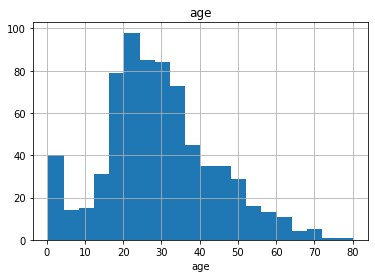

count   714.000
mean      0.000
std       1.001
min      -2.017
1%       -1.977
5%       -1.770
10%      -1.081
20%      -0.737
30%      -0.530
40%      -0.324
50%      -0.117
60%       0.145
70%       0.434
80%       0.778
90%       1.398
95%       1.812
99%       2.492
max       3.465
Name: age_standardscaler, dtype: float64


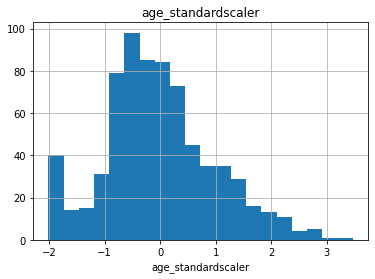

count   714.000
mean      0.095
std       0.813
min      -1.543
1%       -1.510
5%       -1.343
10%      -0.783
20%      -0.503
30%      -0.336
40%      -0.168
50%       0.000
60%       0.213
70%       0.448
80%       0.727
90%       1.231
95%       1.566
99%       2.119
max       2.909
Name: age_robustscaler, dtype: float64


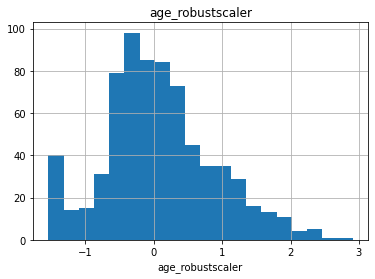

count   714.000
mean      0.368
std       0.183
min       0.000
1%        0.007
5%        0.045
10%       0.171
20%       0.233
30%       0.271
40%       0.309
50%       0.347
60%       0.394
70%       0.447
80%       0.510
90%       0.623
95%       0.698
99%       0.822
max       1.000
Name: age_minmaxscaler, dtype: float64


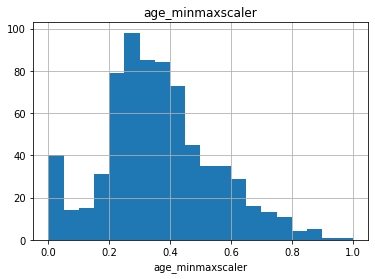

In [ ]:
age_cols = [col for col in dff.columns if "age" in col]
for col in age_cols:
  num_summary(dff, col, plot=True)

# Feature Extraction

## Binary Features

In [ ]:
dff = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/titanic.csv")
dff.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [ ]:
def proportion_ztest(dataframe, new_col, target):
  from statsmodels.stats.proportion import proportions_ztest
  new_col_1 = dataframe.loc[dataframe[new_col]==1, target].sum()
  new_col_0 = dataframe.loc[dataframe[new_col]==0, target].sum()
  new_col_1_count = dataframe.loc[dataframe[new_col]==1, target].shape[0]
  new_col_0_count = dataframe.loc[dataframe[new_col]==0, target].shape[0]
  T_statistic, p_value = proportions_ztest(count=[new_col_1, new_col_0],
                                            nobs=[new_col_1_count, new_col_0_count])
  print("T-statistic: %.4f , P-value: %.4f" %(T_statistic, p_value))
  if p_value < 0.05:
    print("H0 hypothesis is rejected. There is a significant difference")
  else:
    print("The H0 hypothesis cannot be rejected. There is no significant difference")
     


In [ ]:
def binary_featurs(dataframe, col_name, new_col_name, target):
  dataframe[new_col_name] = dataframe[col_name].notnull().astype(int)
  print(dataframe.groupby(new_col_name).agg({target:"mean"}))
  proportion_ztest(dataframe, new_col_name, target)

In [ ]:
binary_featurs(dff, "Cabin", "Cabin_Deck_Bool", "Survived")

                 Survived
Cabin_Deck_Bool          
0                   0.300
1                   0.667
T-statistic: 9.4597 , P-value: 0.0000
H0 hypothesis is rejected. There is a significant difference


## Text Features

In [ ]:
dff["NEW_NAME_LETTER_COUNT"] = dff["Name"].str.len()
dff["NEW_NAME_WORD_COUNT"] = dff["Name"].apply(lambda x: len(str(x).split(" ")))
dff["NEW_NAME_DR"] = dff["Name"].apply(lambda x: len([x for x in x.split() if x.startswith("Dr")]))

In [ ]:
dff.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NEW_NAME_LETTER_COUNT,NEW_NAME_WORD_COUNT,NEW_NAME_DR
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S,23,4,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C,51,7,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S,22,3,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S,44,7,0
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S,24,4,0


In [ ]:
dff.groupby("NEW_NAME_DR").agg({"Survived": ["mean","count"]})

Survived      
                mean count
NEW_NAME_DR               
0              0.383   881
1              0.500    10

## Regex Features

In [ ]:
dff["NEW_TITLE"] = dff["Name"].str.extract(' ([A-Za-z]+)\.', expand=False)
dff[["NEW_TITLE","Survived","Age"]].groupby(["NEW_TITLE"]).agg({"Survived":"mean", "Age": ["count","mean"]})

Survived   Age       
              mean count   mean
NEW_TITLE                      
Capt         0.000     1 70.000
Col          0.500     2 58.000
Countess     1.000     1 33.000
Don          0.000     1 40.000
Dr           0.429     6 42.000
Jonkheer     0.000     1 38.000
Lady         1.000     1 48.000
Major        0.500     2 48.500
Master       0.575    36  4.574
Miss         0.698   146 21.774
Mlle         1.000     2 24.000
Mme          1.000     1 24.000
Mr           0.157   398 32.368
Mrs          0.792   108 35.898
Ms           1.000     1 28.000
Rev          0.000     6 43.167
Sir          1.000     1 49.000

## Date Features

In [ ]:
new_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/course_reviews.csv")
new_df.head()

,Rating,Timestamp,Enrolled,Progress,Questions Asked,Questions Answered
0,5.000,2021-02-05 07:45:55,2021-01-25 15:12:08,5.000,0.000,0.000
1,5.000,2021-02-04 21:05:32,2021-02-04 20:43:40,1.000,0.000,0.000
2,4.500,2021-02-04 20:34:03,2019-07-04 23:23:27,1.000,0.000,0.000
3,5.000,2021-02-04 16:56:28,2021-02-04 14:41:29,10.000,0.000,0.000
4,4.000,2021-02-04 15:00:24,2020-10-13 03:10:07,10.000,0.000,0.000


In [ ]:
from datetime import date
new_df["Timestamp"] = pd.to_datetime(new_df["Timestamp"], format="%Y-%m-%d")
new_df["year"] = new_df["Timestamp"].dt.year
new_df["month"] = new_df["Timestamp"].dt.month
new_df["year_diff"] = date.today().year - new_df["Timestamp"].dt.year
new_df["month_diff"] = (date.today().year - new_df["Timestamp"].dt.year) * 12 + (date.today().month - new_df["Timestamp"].dt.month)
new_df["day_name"] = new_df["Timestamp"].dt.day_name()

In [ ]:
new_df.head()

,Rating,Timestamp,Enrolled,Progress,Questions Asked,Questions Answered,year,month,year_diff,month_diff,day_name
0,5.000,2021-02-05 07:45:55,2021-01-25 15:12:08,5.000,0.000,0.000,2021,2,1,22,Friday
1,5.000,2021-02-04 21:05:32,2021-02-04 20:43:40,1.000,0.000,0.000,2021,2,1,22,Thursday
2,4.500,2021-02-04 20:34:03,2019-07-04 23:23:27,1.000,0.000,0.000,2021,2,1,22,Thursday
3,5.000,2021-02-04 16:56:28,2021-02-04 14:41:29,10.000,0.000,0.000,2021,2,1,22,Thursday
4,4.000,2021-02-04 15:00:24,2020-10-13 03:10:07,10.000,0.000,0.000,2021,2,1,22,Thursday


# Feature Interaction

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/titanic.csv")

df.loc[(df['Sex'] == 'male') & (df['Age'] <= 21), 'NEW_SEX_CAT'] = 'youngmale'

df.loc[(df['Sex'] == 'male') & (df['Age'] > 21) & (df['Age'] < 50), 'NEW_SEX_CAT'] = 'maturemale'

df.loc[(df['Sex'] == 'male') & (df['Age'] >= 50), 'NEW_SEX_CAT'] = 'seniormale'

df.loc[(df['Sex'] == 'female') & (df['Age'] <= 21), 'NEW_SEX_CAT'] = 'youngfemale'

df.loc[(df['Sex'] == 'female') & (df['Age'] > 21) & (df['Age'] < 50), 'NEW_SEX_CAT'] = 'maturefemale'

df.loc[(df['Sex'] == 'female') & (df['Age'] >= 50), 'NEW_SEX_CAT'] = 'seniorfemale'

df.groupby("NEW_SEX_CAT").agg({"Survived":["count","mean"]})

Survived      
                count  mean
NEW_SEX_CAT                
maturefemale      155 0.774
maturemale        281 0.199
seniorfemale       22 0.909
seniormale         52 0.135
youngfemale        84 0.679
youngmale         120 0.250

## Feature Engineering and Data Preprocessing Application

In [101]:
# Import Necessary Librareis and Dataset
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
pd.set_option("display.max_columns",None)
pd.set_option("display.width",500)
pd.set_option("display.float_format", lambda x: '%.3f' % x)
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [102]:
# Capitalize All Variables
def cap_all_variables(dataframe):
  dataframe.columns = [col.upper() for col in dataframe.columns]
  return dataframe.head()

cap_all_variables(df)

,PASSENGERID,SURVIVED,PCLASS,NAME,SEX,AGE,SIBSP,PARCH,TICKET,FARE,CABIN,EMBARKED
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [103]:
# 1. Feature Engineering

# Cabin bool
df["NEW_CABIN_BOOL"] = df["CABIN"].notnull().astype('int')
# Name count
df["NEW_NAME_LETTER_COUNT"] = df["NAME"].str.len()
# name word count
df["NEW_NAME_WORD_COUNT"] = df["NAME"].apply(lambda x: len(str(x).split(" ")))
# name dr
df["NEW_NAME_DR"] = df["NAME"].apply(lambda x: len([x for x in x.split() if x.startswith("Dr")]))
# name title
df['NEW_TITLE'] = df.NAME.str.extract(' ([A-Za-z]+)\.', expand=False)
# family size
df["NEW_FAMILY_SIZE"] = df["SIBSP"] + df["PARCH"] + 1
# age_pclass
df["NEW_AGE_PCLASS"] = df["AGE"] * df["PCLASS"]
# is alone
df.loc[((df['SIBSP'] + df['PARCH']) > 0), "NEW_IS_ALONE"] = "NO"
df.loc[((df['SIBSP'] + df['PARCH']) == 0), "NEW_IS_ALONE"] = "YES"
# age level
df.loc[(df['AGE'] < 18), 'NEW_AGE_CAT'] = 'young'
df.loc[(df['AGE'] >= 18) & (df['AGE'] < 56), 'NEW_AGE_CAT'] = 'mature'
df.loc[(df['AGE'] >= 56), 'NEW_AGE_CAT'] = 'senior'
# sex x age
df.loc[(df['SEX'] == 'male') & (df['AGE'] <= 21), 'NEW_SEX_CAT'] = 'youngmale'
df.loc[(df['SEX'] == 'male') & (df['AGE'] > 21) & (df['AGE'] < 50), 'NEW_SEX_CAT'] = 'maturemale'
df.loc[(df['SEX'] == 'male') & (df['AGE'] >= 50), 'NEW_SEX_CAT'] = 'seniormale'
df.loc[(df['SEX'] == 'female') & (df['AGE'] <= 21), 'NEW_SEX_CAT'] = 'youngfemale'
df.loc[(df['SEX'] == 'female') & (df['AGE'] > 21) & (df['AGE'] < 50), 'NEW_SEX_CAT'] = 'maturefemale'
df.loc[(df['SEX'] == 'female') & (df['AGE'] >= 50), 'NEW_SEX_CAT'] = 'seniorfemale'

In [104]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)
num_cols = [col for col in num_cols if "PASSENGERID" not in col]
print(f'cat_cols: {len(cat_cols)}')
print(f'num_cols: {len(num_cols)}')
print(f'cat_but_car: {len(cat_but_car)}')

cat_cols: 14
num_cols: 4
cat_but_car: 3


In [105]:
# 2. Outliers

for col in num_cols:
  print(col, check_outlier(df, col))

AGE True
FARE True
NEW_NAME_LETTER_COUNT True
NEW_AGE_PCLASS True


In [106]:
for col in num_cols:
  replace_with_thresholds(df, col)

In [107]:
# again check outliers
for col in num_cols:
  print(col, check_outlier(df, col))

AGE False
FARE False
NEW_NAME_LETTER_COUNT False
NEW_AGE_PCLASS False


In [108]:
# 3. Missing Value
missing_value_table(df)

                n_miss  ratio
CABIN              687 77.100
AGE                177 19.870
NEW_AGE_PCLASS     177 19.870
NEW_AGE_CAT        177 19.870
NEW_SEX_CAT        177 19.870
EMBARKED             2  0.220


In [109]:
remove_cols = ["CABIN","TICKET","NAME"]
df.drop(remove_cols, inplace=True, axis=1)

In [110]:
df["AGE"] = df["AGE"].fillna(df.groupby("NEW_TITLE")["AGE"].transform("median"))

In [111]:
# again check missin value
missing_value_table(df)

                n_miss  ratio
NEW_AGE_PCLASS     177 19.870
NEW_AGE_CAT        177 19.870
NEW_SEX_CAT        177 19.870
EMBARKED             2  0.220


In [112]:
# Again create variables by feature engineering
# age_pclass
df["NEW_AGE_PCLASS"] = df["AGE"] * df["PCLASS"]
# is alone
df.loc[((df['SIBSP'] + df['PARCH']) > 0), "NEW_IS_ALONE"] = "NO"
df.loc[((df['SIBSP'] + df['PARCH']) == 0), "NEW_IS_ALONE"] = "YES"
# age level
df.loc[(df['AGE'] < 18), 'NEW_AGE_CAT'] = 'young'
df.loc[(df['AGE'] >= 18) & (df['AGE'] < 56), 'NEW_AGE_CAT'] = 'mature'
df.loc[(df['AGE'] >= 56), 'NEW_AGE_CAT'] = 'senior'
# sex x age
df.loc[(df['SEX'] == 'male') & (df['AGE'] <= 21), 'NEW_SEX_CAT'] = 'youngmale'
df.loc[(df['SEX'] == 'male') & (df['AGE'] > 21) & (df['AGE'] < 50), 'NEW_SEX_CAT'] = 'maturemale'
df.loc[(df['SEX'] == 'male') & (df['AGE'] >= 50), 'NEW_SEX_CAT'] = 'seniormale'
df.loc[(df['SEX'] == 'female') & (df['AGE'] <= 21), 'NEW_SEX_CAT'] = 'youngfemale'
df.loc[(df['SEX'] == 'female') & (df['AGE'] > 21) & (df['AGE'] < 50), 'NEW_SEX_CAT'] = 'maturefemale'
df.loc[(df['SEX'] == 'female') & (df['AGE'] >= 50), 'NEW_SEX_CAT'] = 'seniorfemale'

In [113]:
# again and again :) check missin value
missing_value_table(df)

          n_miss  ratio
EMBARKED       2  0.220


In [114]:
df = df.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype in ["category","object"] and len(x.unique())<=10) else x, axis=0)

In [115]:
# again and again and again :) check missin value
missing_value_table(df)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


In [116]:
# 4. Label Encoding
label_encoder_dataframe(df)

In [117]:
# 5. Rare Encoding
rare_analyser(df, "SURVIVED")

EMBARKED : 3
   COUNT  Ratio  TARGET_MEAN
C    168  0.189        0.554
Q     77  0.086        0.390
S    646  0.725        0.339


NEW_TITLE : 17
          COUNT  Ratio  TARGET_MEAN
Capt          1  0.001        0.000
Col           2  0.002        0.500
Countess      1  0.001        1.000
Don           1  0.001        0.000
Dr            7  0.008        0.429
Jonkheer      1  0.001        0.000
Lady          1  0.001        1.000
Major         2  0.002        0.500
Master       40  0.045        0.575
Miss        182  0.204        0.698
Mlle          2  0.002        1.000
Mme           1  0.001        1.000
Mr          517  0.580        0.157
Mrs         125  0.140        0.792
Ms            1  0.001        1.000
Rev           6  0.007        0.000
Sir           1  0.001        1.000


NEW_AGE_CAT : 3
        COUNT  Ratio  TARGET_MEAN
mature    735  0.825        0.363
senior     39  0.044        0.308
young     117  0.131        0.538


NEW_SEX_CAT : 6
              COUNT  Ratio  TARGET

In [118]:
df = rare_encoder(df, 0.01)

In [119]:
# 6. One Hot Encoding
df = on_hot_encoding(df)

In [120]:
df.head()

,PASSENGERID,SURVIVED,SEX,AGE,FARE,NEW_CABIN_BOOL,NEW_NAME_LETTER_COUNT,NEW_NAME_DR,NEW_AGE_PCLASS,NEW_IS_ALONE,PCLASS_2,PCLASS_3,SIBSP_1,SIBSP_2,SIBSP_3,SIBSP_4,SIBSP_5,SIBSP_8,PARCH_1,PARCH_2,PARCH_3,PARCH_4,PARCH_5,PARCH_6,EMBARKED_Q,EMBARKED_S,NEW_NAME_WORD_COUNT_4,NEW_NAME_WORD_COUNT_5,NEW_NAME_WORD_COUNT_6,NEW_NAME_WORD_COUNT_7,NEW_NAME_WORD_COUNT_8,NEW_NAME_WORD_COUNT_9,NEW_NAME_WORD_COUNT_14,NEW_TITLE_Miss,NEW_TITLE_Mr,NEW_TITLE_Mrs,NEW_TITLE_Rare,NEW_FAMILY_SIZE_2,NEW_FAMILY_SIZE_3,NEW_FAMILY_SIZE_4,NEW_FAMILY_SIZE_5,NEW_FAMILY_SIZE_6,NEW_FAMILY_SIZE_7,NEW_FAMILY_SIZE_8,NEW_FAMILY_SIZE_11,NEW_AGE_CAT_senior,NEW_AGE_CAT_young,NEW_SEX_CAT_maturemale,NEW_SEX_CAT_seniorfemale,NEW_SEX_CAT_seniormale,NEW_SEX_CAT_youngfemale,NEW_SEX_CAT_youngmale
0,1,0,1,22.000,7.250,0,23,0,66.000,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2,1,0,38.000,65.634,1,45,0,38.000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1,0,26.000,7.925,0,22,0,78.000,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,1,0,35.000,53.100,1,44,0,35.000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,0,1,35.000,8.050,0,24,0,105.000,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [121]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)
num_cols = [col for col in num_cols if "PASSENGERID" not in col]
print(f'cat_cols: {len(cat_cols)}')
print(f'num_cols: {len(num_cols)}')
print(f'cat_but_car: {len(cat_but_car)}')

cat_cols: 47
num_cols: 4
cat_but_car: 0


In [122]:
# again check rare variables
rare_analyser(df, "SURVIVED")

SURVIVED : 2
   COUNT  Ratio  TARGET_MEAN
0    549  0.616        0.000
1    342  0.384        1.000


SEX : 2
   COUNT  Ratio  TARGET_MEAN
0    314  0.352        0.742
1    577  0.648        0.189


NEW_CABIN_BOOL : 2
   COUNT  Ratio  TARGET_MEAN
0    687  0.771        0.300
1    204  0.229        0.667


NEW_NAME_DR : 2
   COUNT  Ratio  TARGET_MEAN
0    881  0.989        0.383
1     10  0.011        0.500


NEW_IS_ALONE : 2
   COUNT  Ratio  TARGET_MEAN
0    354  0.397        0.506
1    537  0.603        0.304


PCLASS_2 : 2
   COUNT  Ratio  TARGET_MEAN
0    707  0.793        0.361
1    184  0.207        0.473


PCLASS_3 : 2
   COUNT  Ratio  TARGET_MEAN
0    400  0.449        0.557
1    491  0.551        0.242


SIBSP_1 : 2
   COUNT  Ratio  TARGET_MEAN
0    682  0.765        0.337
1    209  0.235        0.536


SIBSP_2 : 2
   COUNT  Ratio  TARGET_MEAN
0    863  0.969        0.381
1     28  0.031        0.464


SIBSP_3 : 2
   COUNT  Ratio  TARGET_MEAN
0    875  0.982        0.386
1     

In [124]:
def create_and_drop_useless_cols(dataframe, drop=False, rare_prec=0.01):
  useless_cols = [col for col in dataframe.columns if dataframe[col].nunique() == 2 and
                (dataframe[col].value_counts() / len(dataframe) < rare_prec).any(axis=None)]
  if drop:
    dataframe.drop(useless_cols, axis=1, inplace=True)
  
  return useless_cols

In [125]:
create_and_drop_useless_cols(df)

['SIBSP_5',
 'SIBSP_8',
 'PARCH_3',
 'PARCH_4',
 'PARCH_5',
 'PARCH_6',
 'NEW_NAME_WORD_COUNT_9',
 'NEW_NAME_WORD_COUNT_14',
 'NEW_FAMILY_SIZE_8',
 'NEW_FAMILY_SIZE_11']

In [126]:
# 7. Standard Scaler

from sklearn.preprocessing import RobustScaler
cat_cols, num_cols, cat_but_car = grab_col_names(df)
num_cols = [col for col in num_cols if "PASSENGERID" not in col]
rs = RobustScaler()
df[num_cols] = rs.fit_transform(df[num_cols])

In [127]:
df.head()

,PASSENGERID,SURVIVED,SEX,AGE,FARE,NEW_CABIN_BOOL,NEW_NAME_LETTER_COUNT,NEW_NAME_DR,NEW_AGE_PCLASS,NEW_IS_ALONE,PCLASS_2,PCLASS_3,SIBSP_1,SIBSP_2,SIBSP_3,SIBSP_4,SIBSP_5,SIBSP_8,PARCH_1,PARCH_2,PARCH_3,PARCH_4,PARCH_5,PARCH_6,EMBARKED_Q,EMBARKED_S,NEW_NAME_WORD_COUNT_4,NEW_NAME_WORD_COUNT_5,NEW_NAME_WORD_COUNT_6,NEW_NAME_WORD_COUNT_7,NEW_NAME_WORD_COUNT_8,NEW_NAME_WORD_COUNT_9,NEW_NAME_WORD_COUNT_14,NEW_TITLE_Miss,NEW_TITLE_Mr,NEW_TITLE_Mrs,NEW_TITLE_Rare,NEW_FAMILY_SIZE_2,NEW_FAMILY_SIZE_3,NEW_FAMILY_SIZE_4,NEW_FAMILY_SIZE_5,NEW_FAMILY_SIZE_6,NEW_FAMILY_SIZE_7,NEW_FAMILY_SIZE_8,NEW_FAMILY_SIZE_11,NEW_AGE_CAT_senior,NEW_AGE_CAT_young,NEW_SEX_CAT_maturemale,NEW_SEX_CAT_seniorfemale,NEW_SEX_CAT_seniormale,NEW_SEX_CAT_youngfemale,NEW_SEX_CAT_youngmale
0,1,0,1,-0.571,-0.312,0,-0.200,0,0.080,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2,1,0,0.571,2.217,1,2.000,0,-0.480,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1,0,-0.286,-0.283,0,-0.300,0,0.320,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,1,0,0.357,1.674,1,1.900,0,-0.540,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,0,1,0.357,-0.277,0,-0.100,0,0.860,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [128]:
# 8. Model

y = df["SURVIVED"]
X = df.drop(["PASSENGERID","SURVIVED"], axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf_model = RandomForestClassifier(random_state=46).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print("Accuracy: ", accuracy_score(y_pred, y_test))

Accuracy:  0.8022388059701493


In [129]:
# Yesss this is a beautiful functionnnn :)
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    import seaborn as sns
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

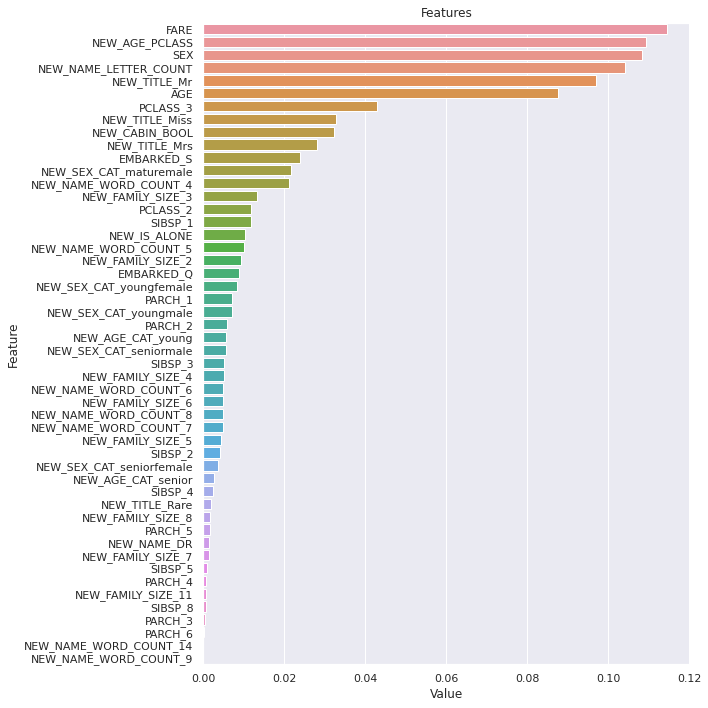

In [130]:
plot_importance(rf_model, X_train)

In [133]:
# The score to be obtained without any data preprocessing?
dff = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/titanic.csv")
dff.dropna(inplace=True)
dff = pd.get_dummies(dff, columns=["Sex", "Embarked"], drop_first=True)
y = dff["Survived"]
X = dff.drop(["PassengerId", "Survived", "Name", "Ticket", "Cabin"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)
rf_model = RandomForestClassifier(random_state=46).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print("Accuracy: ", accuracy_score(y_pred, y_test))

Accuracy:  0.7090909090909091


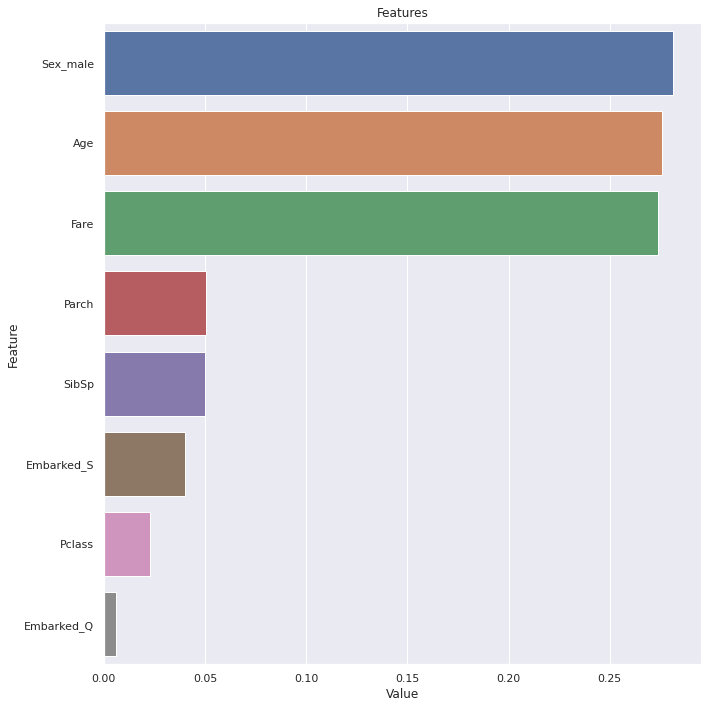

In [134]:
plot_importance(rf_model, X_train)